**Análise de Dados e ETL**

 **Pneumologista João**

**Extração: carregar CSV.**

In [5]:
import pandas as pd

df = pd.read_csv('/content/pneumologista_joao_pacientes.csv')

**Transformação:**

In [ ]:
df['saturacao_oxigenio'].fillna(df['saturacao_oxigenio'].mean(), inplace=True)

df['peso_kg'].fillna(df['peso_kg'].mean(), inplace=True)

df['altura_m'].fillna(df['altura_m'].mean(), inplace=True)

In [8]:
df['saturacao_oxigenio'] = pd.to_numeric(df['saturacao_oxigenio'], errors="coerce")
df['altura_m']= pd.to_numeric(df['altura_m'], errors="coerce")
df['peso_kg'] = pd.to_numeric(df['peso_kg'], errors="coerce")

In [10]:
df['saturacao_oxigenio'] = df['saturacao_oxigenio'].round(1)
df['altura_m'] = df['altura_m'].round(2)
df['peso_kg'] = df['peso_kg'].round(1)

In [12]:
df['sexo'] = df['sexo'].str.lower().replace({
    'f': 'feminino',
    'm': 'masculino',
    'não declarado':'outro',
    'masc':'masculino',
    'fem':'feminino',
    })

In [14]:
df['imc'] = df['peso_kg'] / (df['altura_m'] ** 2)
df['imc'] = pd.to_numeric(df['imc'], errors="coerce")
df['imc'] = df['imc'].round(1)

In [33]:
df

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,feminino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,masculino,Não,Não,Moderado,Média,Sim,Moderado,Não,...,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,masculino,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,masculino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,feminino,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,masculino,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


**Carga:**

In [16]:
df.to_csv('pacientes_limpos.csv', index=False)

**MATPLOTLIB**

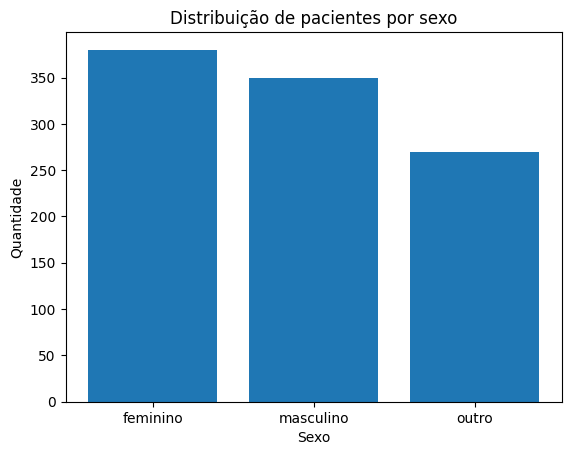

In [28]:
import matplotlib.pyplot as plt

plt.bar(df['sexo'].value_counts().index, df['sexo'].value_counts().values)
plt.title("Distribuição de pacientes por sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.show()


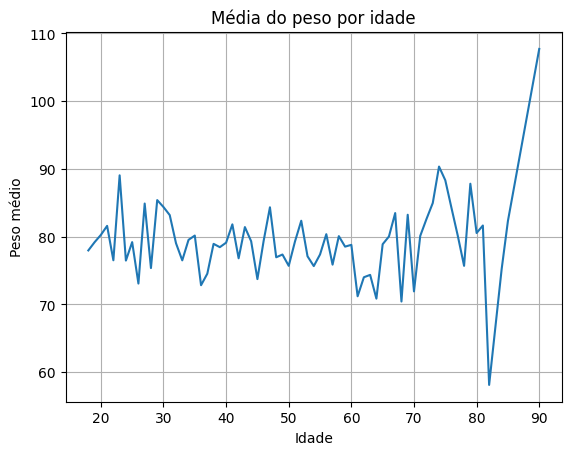

In [36]:

df.groupby('idade')['peso_kg'].mean().plot(kind='line')
plt.title("Média do peso por idade")
plt.xlabel("Idade")
plt.ylabel("Peso médio")
plt.grid(True)
plt.show()

**NumPy**

In [41]:
import numpy as np

media_imc = np.mean(df['imc'])
desvio_imc = np.std(df['imc'])

print(f"Média do IMC: {media_imc:.2f}")
print(f"Desvio padrão do IMC: {desvio_imc:.2f}")


Média do IMC: 27.14
Desvio padrão do IMC: 6.10


**Machine Learning**

**Abordar o problema e Analisar:**

O objetivo é desenvolver um modelo de Machine Learning capaz de identificar o risco de câncer de pulmão

**Obter os dados**

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('/content/pacientes_limpos.csv')
df

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,feminino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,masculino,Não,Não,Moderado,Média,Sim,Moderado,Não,...,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,masculino,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,masculino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Carlos Costa,62,feminino,Sim,Não,Alto,Média,Não,Moderado,Não,...,99.3,Não,Sim,Não,Baixo,Não,49.9,1.84,14.7,Risco
996,Beatriz Lima,43,masculino,Sim,Não,Moderado,Média,Não,Alto,Não,...,96.7,Não,Não,Não,Baixo,Não,111.0,1.63,41.8,Sem Risco
997,André Moreira,26,feminino,Sim,Não,Baixo,Alta,Não,Moderado,Não,...,96.8,Não,Não,Não,Baixo,Não,90.3,1.81,27.6,Sem Risco
998,Ana Rodrigues,29,outro,Sim,Não,Baixo,Alta,Sim,Alto,Não,...,94.3,Não,Não,Sim,Alto,Não,107.5,1.59,42.5,Risco


**Explorar os dados**

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nome_paciente                 1000 non-null   object 
 1   idade                         1000 non-null   int64  
 2   sexo                          1000 non-null   object 
 3   tabagismo                     1000 non-null   object 
 4   descoloracao_dedos            1000 non-null   object 
 5   estresse_mental               1000 non-null   object 
 6   exposicao_poluicao            1000 non-null   object 
 7   doenca_cronica                1000 non-null   object 
 8   nivel_energia                 1000 non-null   object 
 9   fraqueza_imunologica          1000 non-null   object 
 10  problema_respiratorio         1000 non-null   object 
 11  consumo_alcool                1000 non-null   object 
 12  desconforto_garganta          966 non-null    object 
 13  satu

**Tratamento dos dados**

In [118]:
df['risco_cancer_pulmao'] = df['risco_cancer_pulmao'].str.lower().replace({
    'Risco': 1,
    'Sem Risco': 0
    })

**Separar Base de Dados em Arrays**

In [119]:
x_data = df[['idade', 'imc', 'saturacao_oxigenio']]
y_data = df['risco_cancer_pulmao']

**Dividir Base de Dados entre Treino e Teste**

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

**Definir vários modelos e aplicar Treinamento**

In [121]:
modeloRF = RandomForestClassifier()
modeloRF.fit(x_train, y_train)

RandomForestClassifier()

In [122]:
modelTree = DecisionTreeClassifier()
modelTree.fit(x_train, y_train)

DecisionTreeClassifier()

**Validação do Modelo**

**Random Forest Classifier**

In [112]:
y_pred = modeloRF.predict(x_test)
print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_test, y_pred) * 100:.2f}%.")

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 80.00%.


**Decision Tree Classifier**

In [123]:
y_pred = modelTree.predict(x_test)
print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_test, y_pred) * 100:.2f}%.")

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 74.50%.


**Salvar o melhor modelo**

In [124]:
import joblib

joblib.dump(modeloRF, "modelRF.pkl")

['modelRF.pkl']